metrics in linear regression:
1.R**2 =1-(y-y^)**2/(y-y^)**2
2.adj R**2
3.Mean squre Error 1/n sumation(y1-y^1)**2
4.Mean             1/n sumation|y-y^|**2 




R**2 close to 1 *perfect model
                 * good model 
    
    
Logistic regression:
ranging from 0 to 1
threshold
0.5
>=0.5->claim pass
<0.5 ->claim f 
Metrics of classificaton 
      predition    Actual
1.TP   positive    positive 
2.Tn   negative    negative
3.Fp   postive     negative 
4.Fn   Neg         positive

confusion metrics:
    p-prediction
    A-actual
    1-positive
    0-negative 
    
1.Accuracy => tp+tn/(tp+tn+fp+fn);
2.Recall =>tp/ap? Tp/(tp+fn);
3. precision => tp/pp=>tp/(tp+fp);




In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df1=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/HHE_MA_July31_Batch/main/titanic-training-data.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df1.shape

(891, 12)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

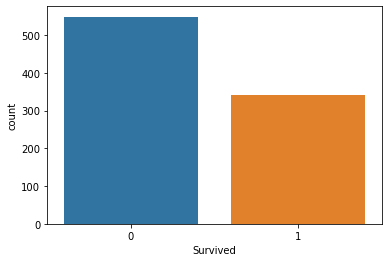

In [9]:
sns.countplot(x='Survived',data=df1)

In [10]:
pd.crosstab(df1["Survived"],df1["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

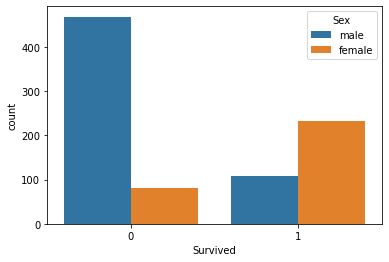

In [11]:
sns.countplot(x="Survived",hue="Sex",data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

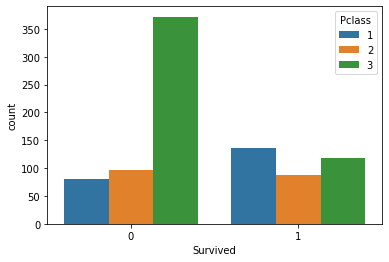

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=df1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

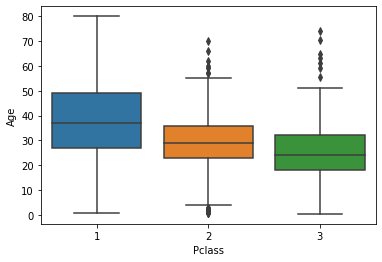

In [13]:
sns.boxplot(x="Pclass",y='Age',data=df1)

In [14]:
df1.drop("Cabin",axis=1,inplace=True)

In [15]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df1.dropna(inplace=True)

In [17]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
dummies=pd.get_dummies(df1[["Pclass","Embarked","Sex"]],drop_first=True)

In [19]:
df1=pd.concat([df1,dummies],axis=1)

In [20]:
df1=df1.drop(['Embarked','Sex','Name','PassengerId','Ticket','Fare'],axis=1)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Pclass      712 non-null    int64  
 6   Embarked_Q  712 non-null    uint8  
 7   Embarked_S  712 non-null    uint8  
 8   Sex_male    712 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 41.0 KB


In [22]:
X=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
model.score(X_train,y_train)

0.8092369477911646

In [27]:
model.score(X_test,y_test)

0.794392523364486

In [28]:
predictions=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.794392523364486

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,predictions)

array([[104,  22],
       [ 22,  66]], dtype=int64)

In [32]:
from sklearn import metrics

<AxesSubplot:>

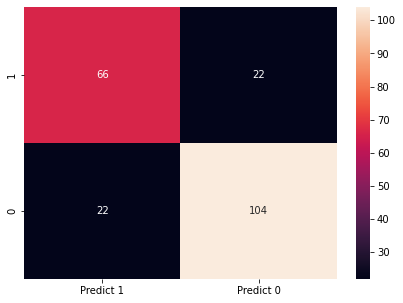

In [33]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [34]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.75      0.75      0.75        88

    accuracy                           0.79       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.79      0.79      0.79       214



In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9598393574297188
0.7570093457943925


In [37]:
model2_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model2_reg.fit(X_train,y_train)
print(model2_reg.score(X_train,y_train))
print(model2_reg.score(X_test,y_test))

0.8192771084337349
0.7897196261682243


In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
model3=BaggingClassifier(n_estimators=20,max_features=5,base_estimator=model2)
model3.fit(X_train,y_train) 
print(model3.score(X_train,y_train))
print(model.score(X_test,y_test))


0.9176706827309237
0.794392523364486


In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
model4=AdaBoostClassifier(n_estimators=20,base_estimator=model3)
model4.fit(X_train,y_train)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.9598393574297188
0.7616822429906542


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
model5=GradientBoostingClassifier(n_estimators=50)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.891566265060241
0.7616822429906542


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model6=RandomForestClassifier(n_estimators=10,max_features=3)
model6.fit(X_train,y_train)
print(model6.score(X_train,y_train))
print(model6.score(X_test,y_test))


0.9497991967871486
0.7476635514018691


In [50]:
from sklearn.svm import SVC
model7=SVC(C=1.0,kernel='rbf', gamma='scale') 
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

0.6345381526104418
0.616822429906542
